In [1]:
import sympy as sym
from sympy import I, pi, oo, sqrt, sin, cos, exp

import numpy as np
from numpy import linalg 

import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1:
Calculate the first 10 moments of N(0,1)

In [2]:
## Calculating the first 10 moments of N(0,1) using the definition of m_n

x, k = sym.symbols('x k')

p_x = 1/sqrt(2*pi)*exp(-x**2/2)

for n in range(1,11):
    i = sym.integrate(p_x*x**n, (x, -oo, oo) )
    print('m_{:} = {:}'.format(n, i))

m_1 = 0
m_2 = 1
m_3 = 0
m_4 = 3
m_5 = 0
m_6 = 15
m_7 = 0
m_8 = 105
m_9 = 0
m_10 = 945


In [3]:
## Calculating the first 10 moments of N(0,1) using the characteristic function

characteristic_func =  sym.exp(-k**2/2)

for n in range(1,11):    
    expr = (I)**n * sym.diff(characteristic_func, k,n)
    print('m_{:} = {:}'.format(n,expr.subs(k, 0)))

m_1 = 0
m_2 = 1
m_3 = 0
m_4 = 3
m_5 = 0
m_6 = 15
m_7 = 0
m_8 = 105
m_9 = 0
m_10 = 945


## Exercise 2:
Generalize the addition law for $S = \sum X_i\cdot a_i$ where $X_i = N(\mu_i, \sigma_i)$, $a_i$ = weight

 Let $X_1, X_2, ..., X_N$ be independent random variable with normal distribution. We define a new random variable $X$:
 $$S = a_i\cdot X_1+ a_2\cdot X_2+...a_N\cdot X_N$$
 
 The probability distribution of $S$ is the convolution of probability distributions $P_1(x_1),...,P_N(x_N)$:
 
 $$ P(s) = \int P_1(x_1)\cdot P_2(x_2)\cdot ... \cdot P_{N-1}(x_{N-1})\cdot P_N(s-a_1x_1-...-a_{N-1}x_{N-1})ds$$
 
 The characteristic function of P(x) is equal to:
 $$\hat{P}(x) =  \int_{-\infty}^\infty  ds\cdot  P_1(x_1)\cdot P_2(x_2)\cdot ... \cdot P_{N-1}(x_{N-1})\cdot P_N(s-a_ix_1-...-a_{N-1}x_{N-1})e^{iks} $$

$$\hat{P}(x) = e^{ik(a_1\mu_1+a_2\mu_2+...+a_N\mu_N)} e^{-\frac{1}{2}k^2(a_1^2\sigma_1^2+...+a_N^2\sigma_N^2)} = e^{ik\mu}e^{-\frac{1}{2}k^2\sigma^2}$$

 Taking the inverse Fourier transform we retrieve a normal distribution:
 
 $X \sim N(\mu,\sigma)$ where: $\mu = \sum_{i=1}^N a_i\mu_i$  and  $\sigma^2 = \sum_{i=1}^N a_i^2\sigma^2_i$.
 
 
 

##  Exercise 3:

NO IDEA

In [33]:
M = np.random.normal(loc = 0, scale = 1, size = (100,100))
X = 0.5 * (M + M.transpose())

In [34]:
%time
w,v = linalg.eig(X)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


(array([1., 1., 5., 8., 4., 6., 3., 1., 2., 1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

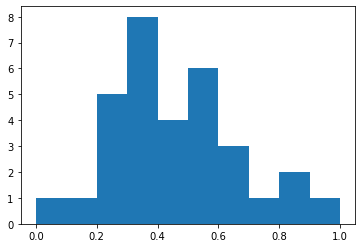

In [35]:
diagonal = np.diag(X)

plt.hist(diagonal, bins = 10, range=(0,1))

(array([ 2.,  9., 11., 14., 14., 14., 14., 12.,  8.,  2.]),
 array([-16. , -12.8,  -9.6,  -6.4,  -3.2,   0. ,   3.2,   6.4,   9.6,
         12.8,  16. ]),
 <a list of 10 Patch objects>)

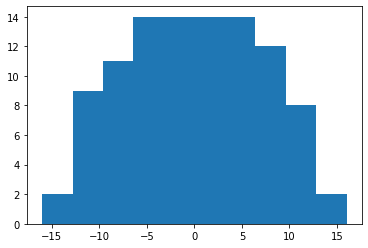

In [39]:
plt.hist(w, bins = 10, range=(-16,16))

In [38]:
w.sort()
w

array([-14.0580716 , -13.39983495, -12.74947433, -12.41322488,
       -12.1444035 , -11.48117766, -11.42619263, -10.66173381,
       -10.38889468,  -9.93671811,  -9.89303911,  -9.46498898,
        -9.0834467 ,  -8.77341217,  -8.69607757,  -8.11011553,
        -7.7563497 ,  -7.59062166,  -7.44487779,  -7.28149506,
        -6.68242173,  -6.54499354,  -6.38872662,  -6.22593038,
        -5.99425913,  -5.49076599,  -5.38088003,  -5.11583418,
        -5.04285104,  -4.63540512,  -4.40136375,  -4.2277613 ,
        -3.71535455,  -3.54862973,  -3.36237376,  -3.26867656,
        -2.89632972,  -2.79890982,  -2.55578669,  -2.18170049,
        -2.09213012,  -1.98241065,  -1.68070947,  -1.31138534,
        -1.14706904,  -1.12344749,  -0.76395846,  -0.67287   ,
        -0.43839598,  -0.15605191,   0.11478834,   0.24881478,
         0.42010326,   0.67385129,   1.04194562,   1.34893659,
         1.44709399,   1.64991918,   1.94595144,   2.17496945,
         2.28400166,   2.33474112,   2.6180666 ,   3.10